In [12]:
import warnings
warnings.filterwarnings('ignore')


https://datascienceschool.net/view-notebook/a60e97ad90164e07ad236095ca74e657/

분산 분석을 이용한 카테고리 값의 영향 분석

In [3]:
# data 가져오기
df_raw = pd.read_csv('../train.csv')

# 필요한 함수 정의

def isstr(col):
    if col.dtype == 'O':
        return True
    else:
        return False
    
# string type(정확히는 Object 타입) column만 가져오기

strcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]):
        strcol_name.append(i)
    i+=1
    
# SalePrice가 있는 col 포함 시켜주기 = 80번째
strcol_name.append(80)

# str 컬럼의 idx를 가져와서 str type col 만 df_str에 넣어줌.
df_str = df_raw.iloc[:, strcol_name]

# 숫자타입 column만 가져오기

numcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]) == False:
        numcol_name.append(i)
    i+=1

# 숫자타입 컬럼의 idx를 가져와서 숫자타입 col 만 df_num에 넣어줌.
df_num = df_raw.iloc[:, numcol_name]

In [16]:
df_str.columns[0]

'MSZoning'

<  Street  >


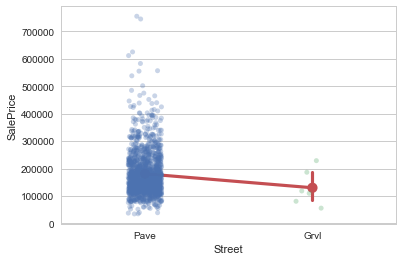

               df        sum_sq       mean_sq            F  PR(>F)
C(Street)     2.0  4.780492e+13  2.390246e+13  3791.150026     0.0
Residual   1458.0  9.192406e+12  6.304805e+09          NaN     NaN


In [270]:
cols = df_str.columns
x1 = cols[1]
print("< ", x1, " >")
sns.stripplot(x=x1, y="SalePrice", data=df_str, jitter=True, alpha=.3)
sns.pointplot(x=x1, y="SalePrice", data=df_str, dodge=True, color='r')
plt.show()
model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(x1), data=df_str)
res_anova = sm.stats.anova_lm(model.fit())
print(res_anova)

In [279]:
res_anova.product()[4]

0.0

<  MSZoning  >


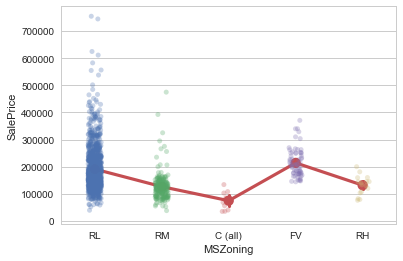

<  Street  >


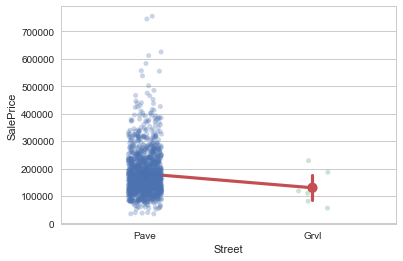

<  Alley  >


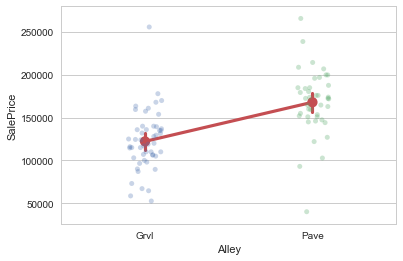

<  LotShape  >


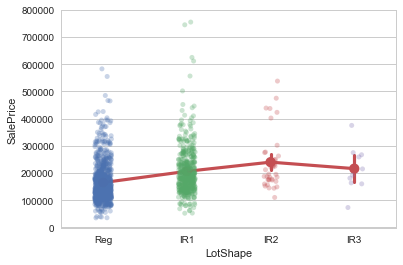

<  LandContour  >


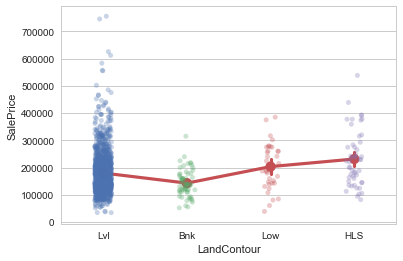

<  Utilities  >


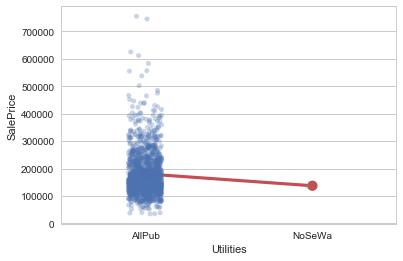

<  LotConfig  >


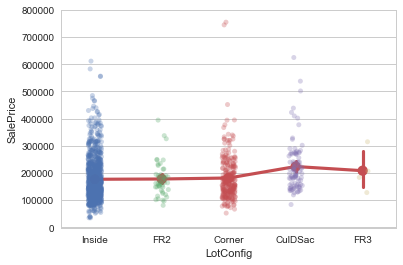

<  LandSlope  >


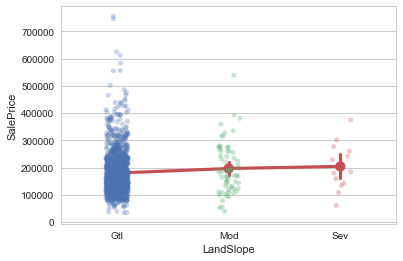

<  Neighborhood  >


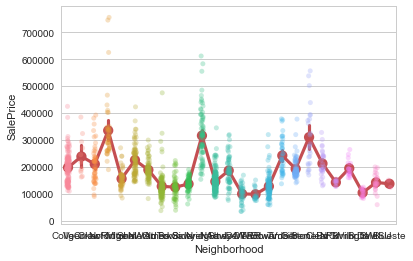

<  Condition1  >


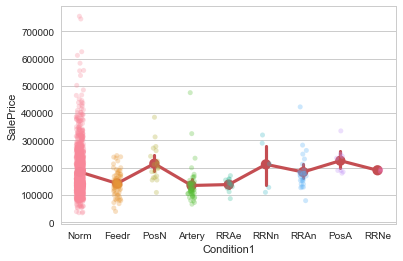

<  Condition2  >


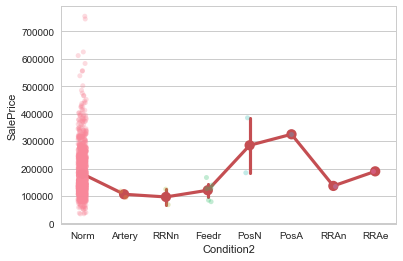

<  BldgType  >


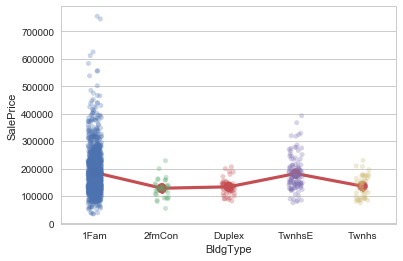

<  HouseStyle  >


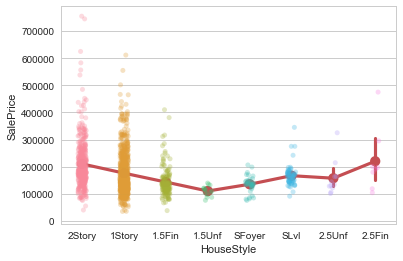

<  RoofStyle  >


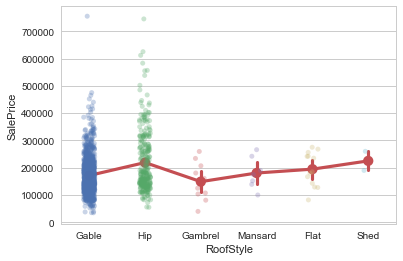

<  RoofMatl  >


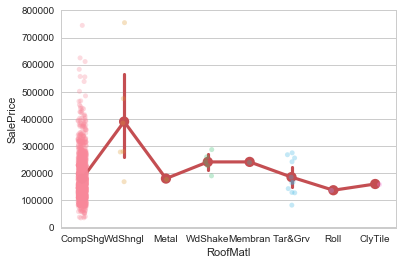

<  Exterior1st  >


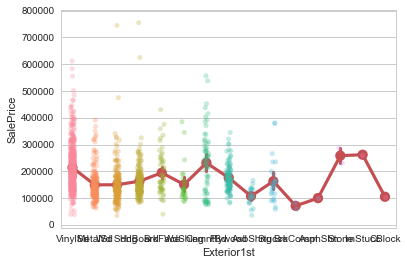

<  Exterior2nd  >


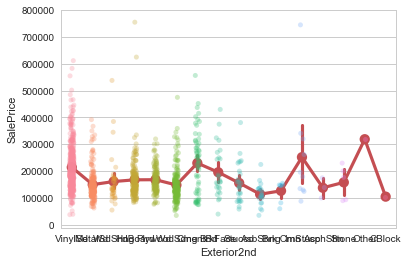

<  MasVnrType  >


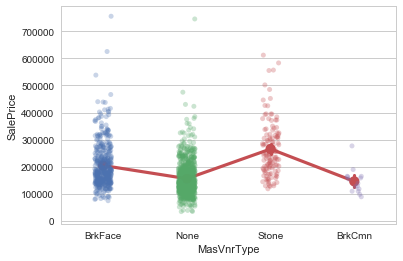

<  ExterQual  >


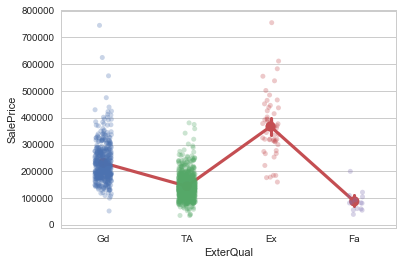

<  ExterCond  >


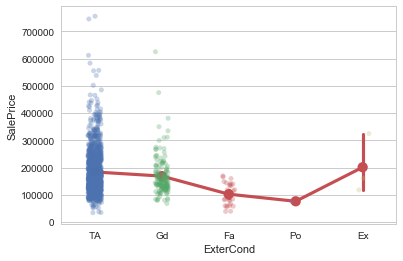

<  Foundation  >


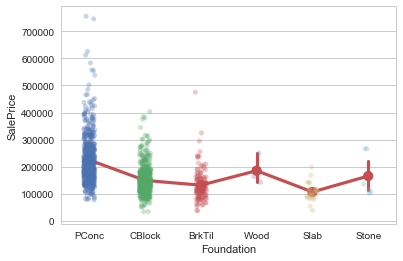

<  BsmtQual  >


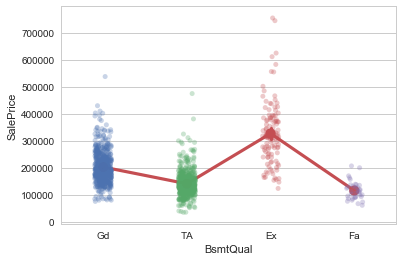

<  BsmtCond  >


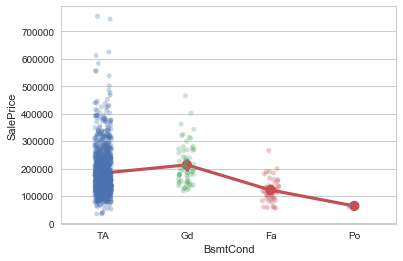

<  BsmtExposure  >


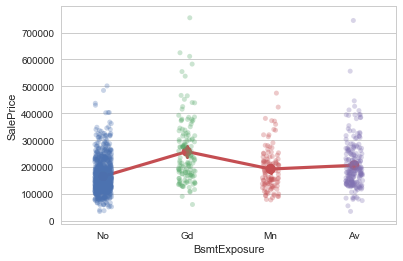

<  BsmtFinType1  >


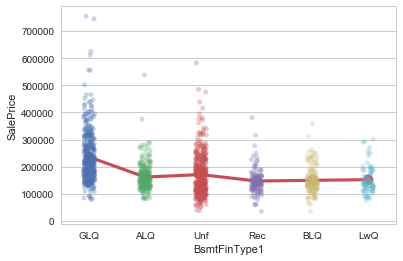

<  BsmtFinType2  >


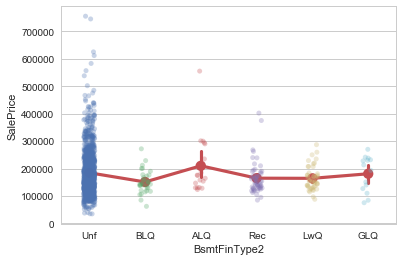

<  Heating  >


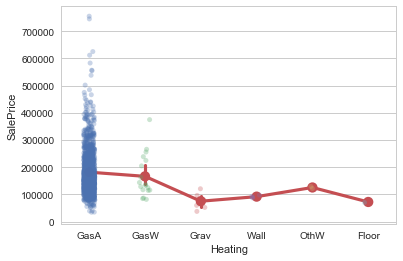

<  HeatingQC  >


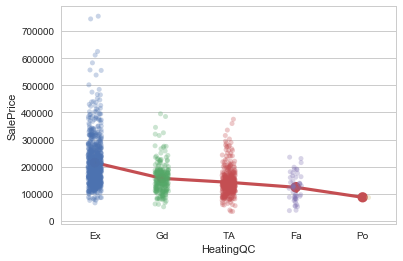

<  CentralAir  >


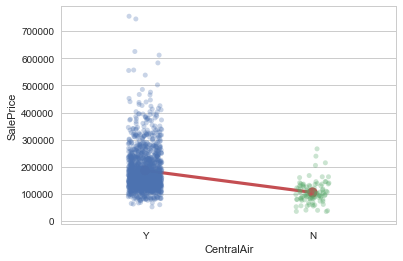

<  Electrical  >


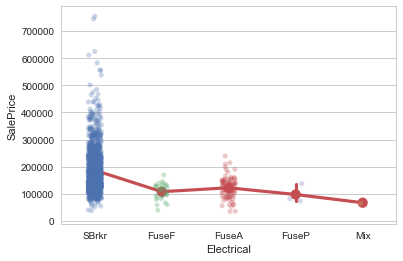

<  KitchenQual  >


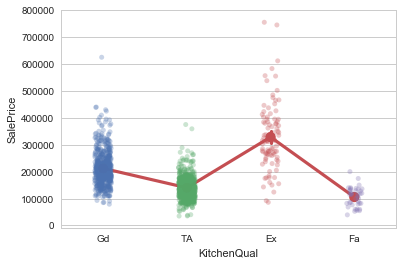

<  Functional  >


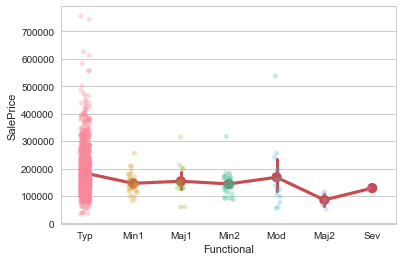

<  FireplaceQu  >


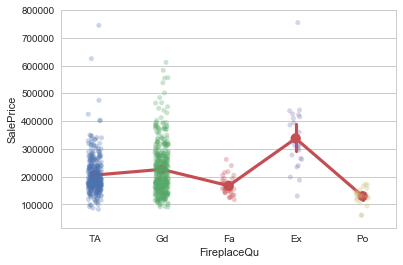

<  GarageType  >


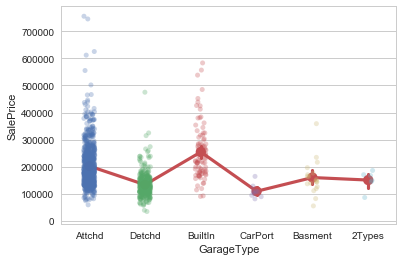

<  GarageFinish  >


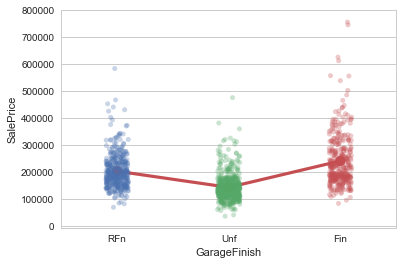

<  GarageQual  >


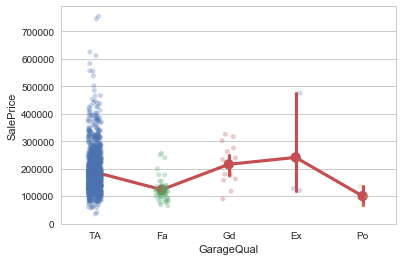

<  GarageCond  >


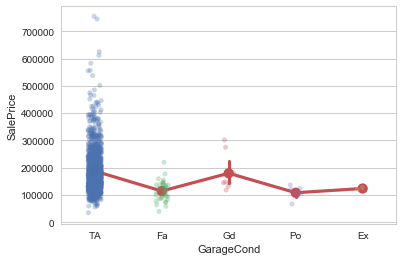

<  PavedDrive  >


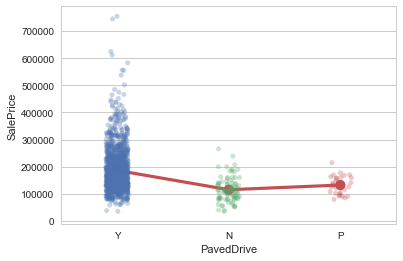

<  PoolQC  >


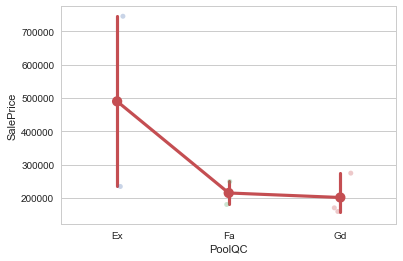

<  Fence  >


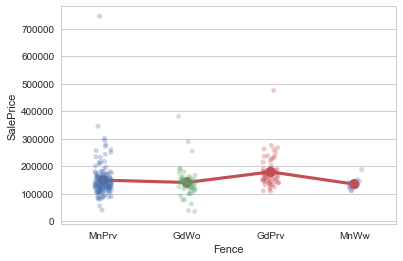

<  MiscFeature  >


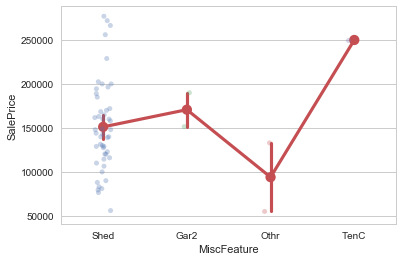

<  SaleType  >


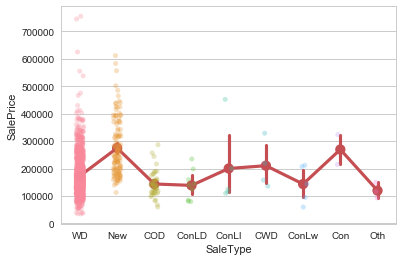

<  SaleCondition  >


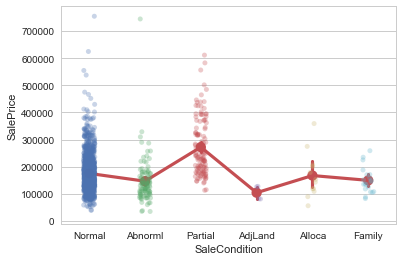

<  SalePrice  >


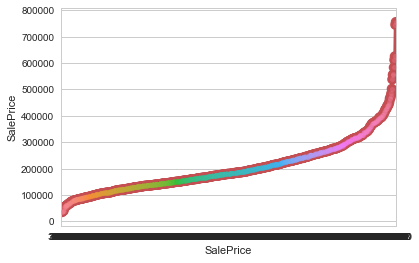

In [290]:
cols = df_str.columns
for x1 in cols:
    print("< ", x1, " >")
    sns.stripplot(x=x1, y="SalePrice", data=df_str, jitter=True, alpha=.3)
    sns.pointplot(x=x1, y="SalePrice", data=df_str, dodge=True, color='r')
    plt.show()
    model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(x1), data=df_str)

In [282]:
cols = df_str.columns
anova_test = pd.DataFrame(columns=['col_name', 'f-test'])
for x1 in cols:
#     print("< ", x1, " >")
#     sns.stripplot(x=x1, y="SalePrice", data=df_str, jitter=True, alpha=.3)
#     sns.pointplot(x=x1, y="SalePrice", data=df_str, dodge=True, color='r')
#     plt.show()
    model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(x1), data=df_str)
    
    f_test = sm.stats.anova_lm(model.fit()).product()[4]
    
    anova_test = anova_test.append({'col_name': x1, 'f-test':f_test}, ignore_index=True)

In [283]:
anova_test

,col_name,f-test
0,MSZoning,0.000000e+00
1,Street,0.000000e+00
2,Alley,1.307856e-55
3,LotShape,0.000000e+00
4,LandContour,0.000000e+00
5,Utilities,0.000000e+00
6,LotConfig,0.000000e+00
7,LandSlope,0.000000e+00
8,Neighborhood,0.000000e+00
9,Condition1,0.000000e+00


In [83]:
cols = df_num.columns
txt =""
for col in cols:
    txt = txt +  " + " +col
txt

' + Id + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + n1stFlrSF + n2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + n3SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + SalePrice'

In [24]:
cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [74]:
df_num.rename(columns={'1stFlrSF': 'n1stFlrSF', '2ndFlrSF': 'n2ndFlrSF', '3SsnPorch': 'n3SsnPorch'}, inplace=True)

In [103]:
model = sm.OLS.from_formula("SalePrice ~ MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + n1stFlrSF + n2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + n3SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold", data=df_num)
result = model.fit()
res_df = sm.stats.anova_lm(result, typ=2)
res_df = res_df.sort_values("PR(>F)")

In [292]:
cols = res_df.index
txt =""
for col in cols:
    txt = txt + " + scale(" + col + ")"
txt

' + scale(OverallQual) + scale(MSSubClass) + scale(GarageCars) + scale(BedroomAbvGr) + scale(MasVnrArea) + scale(GrLivArea) + scale(OverallCond) + scale(TotRmsAbvGrd) + scale(YearBuilt) + scale(LotArea) + scale(KitchenAbvGr) + scale(BsmtFinSF1) + scale(ScreenPorch) + scale(BsmtFullBath) + scale(WoodDeckSF) + scale(PoolArea) + scale(Fireplaces) + scale(n2ndFlrSF) + scale(LotFrontage) + scale(TotalBsmtSF) + scale(n1stFlrSF) + scale(FullBath) + scale(YearRemodAdd) + scale(n3SsnPorch) + scale(BsmtUnfSF) + scale(MiscVal) + scale(GarageYrBlt) + scale(GarageArea) + scale(MoSold) + scale(BsmtHalfBath) + scale(EnclosedPorch) + scale(HalfBath) + scale(YrSold) + scale(BsmtFinSF2) + scale(OpenPorchSF) + scale(LowQualFinSF) + scale(Residual)'

In [44]:
cols = ['OverallQual', 'GrLivArea', 'MSSubClass', 'GarageCars', 'BedroomAbvGr','OverallCond','TotRmsAbvGrd','YearBuilt','LotArea','KitchenAbvGr'] #'MasVnrArea',

In [293]:
txt =""
for col in cols:
    txt = txt + "', '" + col
txt

"', 'OverallQual', 'MSSubClass', 'GarageCars', 'BedroomAbvGr', 'MasVnrArea', 'GrLivArea', 'OverallCond', 'TotRmsAbvGrd', 'YearBuilt', 'LotArea', 'KitchenAbvGr', 'BsmtFinSF1', 'ScreenPorch', 'BsmtFullBath', 'WoodDeckSF', 'PoolArea', 'Fireplaces', 'n2ndFlrSF', 'LotFrontage', 'TotalBsmtSF', 'n1stFlrSF', 'FullBath', 'YearRemodAdd', 'n3SsnPorch', 'BsmtUnfSF', 'MiscVal', 'GarageYrBlt', 'GarageArea', 'MoSold', 'BsmtHalfBath', 'EnclosedPorch', 'HalfBath', 'YrSold', 'BsmtFinSF2', 'OpenPorchSF', 'LowQualFinSF', 'Residual"

In [288]:
#nan 처리
df_num2 = df_num.copy()
df_num2 = df_num2.fillna(method='ffill')
model_num = sm.OLS.from_formula("np.log(SalePrice) ~ scale(OverallQual**2) + scale(MSSubClass) + scale(GarageCars) + scale(GrLivArea) + scale(OverallCond) + scale(TotRmsAbvGrd) + scale(YearBuilt) + scale(LotArea) + scale(BsmtFinSF1) + scale(ScreenPorch) + scale(BsmtFullBath) + scale(WoodDeckSF) + scale(PoolArea) + scale(Fireplaces)", data=df_num2)
result_num = model_num.fit()
print(result_num.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     634.8
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:06:16   Log-Likelihood:                 704.61
No. Observations:                1460   AIC:                            -1379.
Df Residuals:                    1445   BIC:                            -1300.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [289]:
# F검정이용
sm.stats.anova_lm(result_num, typ=2)

,sum_sq,df,F,PR(>F)
scale(OverallQual ** 2),9.578801,1.0,425.099510,5.307202e-83
scale(MSSubClass),1.450465,1.0,64.370470,2.113536e-15
scale(GarageCars),2.581107,1.0,114.547462,8.876960e-26
scale(GrLivArea),4.112776,1.0,182.521719,2.958723e-39
scale(OverallCond),5.179661,1.0,229.869198,2.689285e-48
scale(TotRmsAbvGrd),0.127551,1.0,5.660621,1.747919e-02
scale(YearBuilt),9.014225,1.0,400.044097,9.277808e-79
scale(LotArea),0.508188,1.0,22.552997,2.247332e-06
scale(BsmtFinSF1),0.141275,1.0,6.269663,1.239176e-02
scale(ScreenPorch),0.529989,1.0,23.520487,1.369485e-06


In [ ]:
# data 가져오기
df_test = pd.read_csv('../test.csv')
df_test = df_test.fillna(method='ffill')
pre = pd.DataFrame(result.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

In [250]:
# data 가져오기
df_test = pd.read_csv('../test.csv')
df_test = df_test.fillna(method='ffill')

In [260]:
pre = pd.DataFrame(result.predict(df_test))

In [261]:
pre['Id']=pre.index

In [262]:
pre = pre.rename(columns={0: 'SalePrice'})

In [263]:
pre['Id'] = range(1461,2920)

In [264]:
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))

In [207]:
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.log(x))

In [258]:
pre.to_csv('submission.csv', index=False)

In [257]:
pre.describe()

,SalePrice,Id
count,1.459000e+03,1459.000000
mean,1.774762e+05,2190.000000
std,7.630457e+04,421.321334
min,5.995321e+04,1461.000000
25%,1.268660e+05,1825.500000
50%,1.566620e+05,2190.000000
75%,2.068626e+05,2554.500000
max,1.097911e+06,2919.000000


In [265]:
pre.describe()

,SalePrice,Id
count,1.459000e+03,1459.000000
mean,2.319491e+35,2190.000000
std,2.601892e+36,421.321334
min,6.732590e+04,1461.000000
25%,1.092724e+07,1825.500000
50%,1.659796e+09,2190.000000
75%,7.046341e+12,2554.500000
max,5.655844e+37,2919.000000


In [215]:
pre.iloc[232:235]

,SalePrice,Id
232,177830.048557,1693
233,187928.831986,1694
234,183087.623366,1695


In [199]:
pre.tail()

,0
1454,13.277381
1455,13.261470
1456,16.516274
1457,16.041992
1458,29.737339


In [259]:
df_test['OverallQual']=df_test['OverallQual'].apply(lambda x :x**2 )

In [249]:
y = np.log(5)
np.exp(12)

162754.79141900392